<h2><CENTER>AMCAT - Exploratory_Data_Analysis 

#### Description :
The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on engineering students. It includes employment outcomes (Salary, Job Titles, Job Locations) and standardized scores in cognitive, technical, and personality skills. The dataset also features demographic information, with around 39 independent variables (both continuous and categorical) and 4000 data points. Each candidate has a unique identifier.

In [1]:
# Importing required packages...
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
# importing dataset
amcat_data=pd.read_csv("amcat.csv")
amcat_data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
#Removing unwanted columns
amcat_data.drop(columns=["Unnamed: 0"], inplace=True)


In [4]:
# Getting Discriptive Statistics
amcat_data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [5]:
# How many records in it ?
amcat_data.shape

(3998, 38)

In [6]:
# What are the columns in a dataset.
amcat_data.columns


Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
# count of datatypes
amcat_data.dtypes.value_counts()

int64      17
object     11
float64    10
Name: count, dtype: int64

In [8]:
# information about dataset.
amcat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [9]:
# An issue founded that DOJ,DOB aren't in respective datatype, 
# Also replacing present in DOL with current datetime,if need.lets convert them....

col_lst = ['DOJ', 'DOL', 'DOB']
for col in col_lst:
    amcat_data[col] = amcat_data[col].replace('present', pd.Timestamp.now())
    amcat_data[col] = pd.to_datetime(amcat_data[col], errors='coerce')

amcat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [10]:
# Identifying null values
amcat_data.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [11]:
# Identifying duplicated values count 
amcat_data.duplicated().sum()

0

In [12]:
# Identifying unique values count in each column
amcat_data.nunique().sort_values(ascending=False)

ID                       3998
DOB                      1872
CollegeID                1350
CollegeCityID            1350
collegeGPA               1282
10percentage              851
12percentage              801
Designation               419
12board                   340
JobCity                   339
10board                   275
Domain                    243
nueroticism               217
Salary                    177
extraversion              154
agreeableness             149
openess_to_experience     142
conscientiousness         141
Quant                     138
English                   111
Logical                   107
DOJ                        81
ComputerProgramming        79
DOL                        67
Specialization             46
MechanicalEngg             42
ElectricalEngg             31
ElectronicsAndSemicon      29
TelecomEngg                26
CollegeState               26
CivilEngg                  23
ComputerScience            20
12graduation               16
Graduation

In [13]:
# Segreation of datatype columns

amcat_int=amcat_data.select_dtypes(["int64"])
amcat_float=amcat_data.select_dtypes(["float64"])
amcat_object=amcat_data.select_dtypes(["object"])


In [14]:
amcat_int.columns.to_list()

['ID',
 '12graduation',
 'CollegeID',
 'CollegeTier',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg']

In [15]:
amcat_float.columns.to_list()

['Salary',
 '10percentage',
 '12percentage',
 'collegeGPA',
 'Domain',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [16]:
amcat_object.columns.to_list()

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

<h2><center>Univariate Analysis 

<f5>**Defination:**       Univariate analysis is the simplest form of data analysis, focusing on a single variable

##### A. Univarate_Categorical_Analysis :

In [17]:
# Defining a function for univariate analysis
def Univariate_Categorical_Analysis(disc_data):
    for col in disc_data:
        print("*"*10,col,"*"*10)
        print(disc_data[col].agg(["count","unique","nunique"]),"\n")

In [18]:
#Just calling few columns 
Univariate_Categorical_Analysis(amcat_object[["Designation","Gender","Specialization"]])

********** Designation **********
count                                                   3998
unique     [senior quality engineer, assistant manager, s...
nunique                                                  419
Name: Designation, dtype: object 

********** Gender **********
count        3998
unique     [f, m]
nunique         2
Name: Gender, dtype: object 

********** Specialization **********
count                                                   3998
unique     [computer engineering, electronics and communi...
nunique                                                   46
Name: Specialization, dtype: object 



##### B. Univarate_Numerical_Analysis

In [19]:
def Univariate_Numerical_Analysis(disc_data):
    for col in disc_data:
        print("*"*10,col,"*"*10)
        print(disc_data[col].agg(["min","max","mean","median","std","skew","kurtosis"]),"\n")
        

In [20]:
# calling integer columns
Univariate_Numerical_Analysis(amcat_int[['ComputerProgramming','ElectronicsAndSemicon','ComputerScience']])

********** ComputerProgramming **********
min          -1.000000
max         840.000000
mean        353.102801
median      415.000000
std         205.355519
skew         -0.778106
kurtosis     -0.666352
Name: ComputerProgramming, dtype: float64 

********** ElectronicsAndSemicon **********
min          -1.000000
max         612.000000
mean         95.328414
median       -1.000000
std         158.241218
skew          1.195975
kurtosis     -0.210374
Name: ElectronicsAndSemicon, dtype: float64 

********** ComputerScience **********
min          -1.000000
max         715.000000
mean         90.742371
median       -1.000000
std         175.273083
skew          1.529521
kurtosis      0.692641
Name: ComputerScience, dtype: float64 



In [21]:
# calling Float columns
Univariate_Numerical_Analysis(amcat_float.iloc[:, [3, 5,7]])

********** collegeGPA **********
min          6.450000
max         99.930000
mean        71.486171
median      71.720000
std          8.167338
skew        -1.249209
kurtosis    10.234244
Name: collegeGPA, dtype: float64 

********** conscientiousness **********
min        -4.126700
max         1.995300
mean       -0.037831
median      0.046400
std         1.028666
skew       -0.527003
kurtosis    0.122596
Name: conscientiousness, dtype: float64 

********** extraversion **********
min        -4.600900
max         2.535400
mean        0.002763
median      0.091400
std         0.951471
skew       -0.523267
kurtosis    0.643969
Name: extraversion, dtype: float64 



In [22]:
# Get statistics ,plots regarding Salary .Interpret how it distributed in data.

Univariate_Numerical_Analysis(amcat_float.loc[:, ["Salary"]])


********** Salary **********
min         3.500000e+04
max         4.000000e+06
mean        3.076998e+05
median      3.000000e+05
std         2.127375e+05
skew        6.451081e+00
kurtosis    8.093000e+01
Name: Salary, dtype: float64 



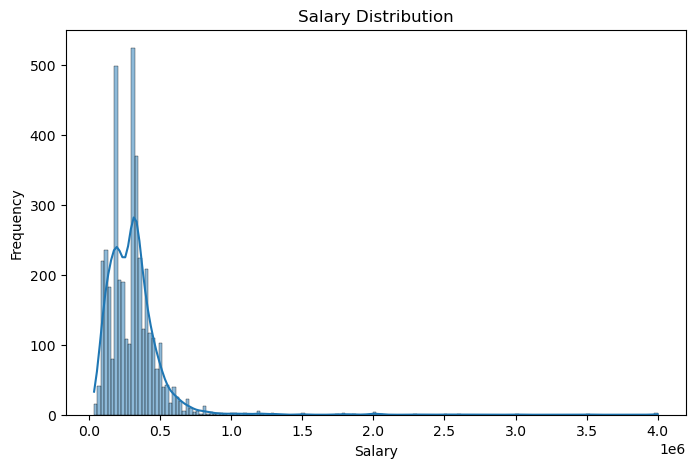

In [23]:
# Histogram
plt.figure(figsize=(8, 5))
sb.histplot(amcat_data.Salary, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

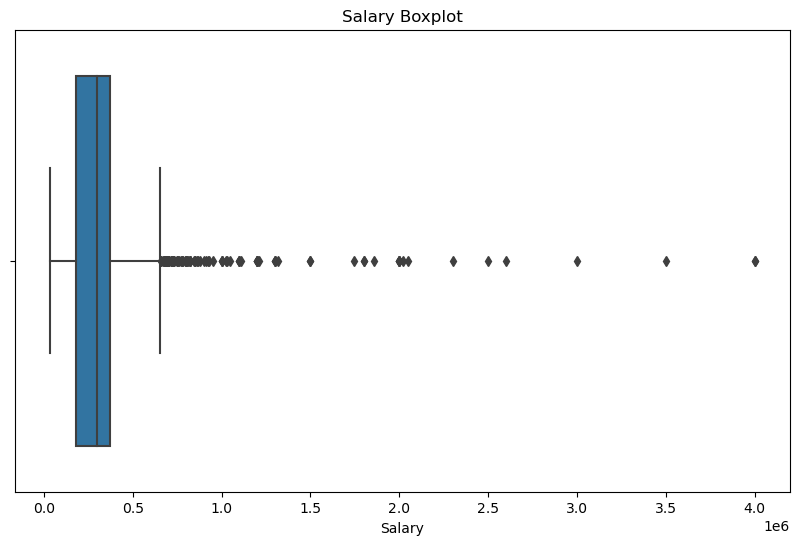

In [24]:
# Outliers in Salary
plt.figure(figsize=(10, 6))
sb.boxplot(x=amcat_data.Salary)
plt.title('Salary Boxplot')
plt.xlabel('Salary')
plt.show()


**Insights:** <br>
- The targeted salary attribute having outliers that are skewed right.It indicates that most of the candidates candidates having higher salaries than the average.

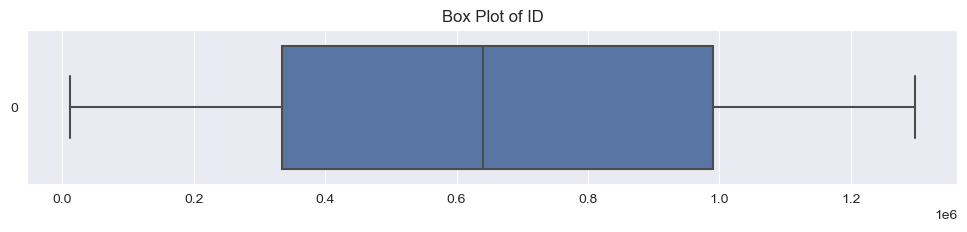

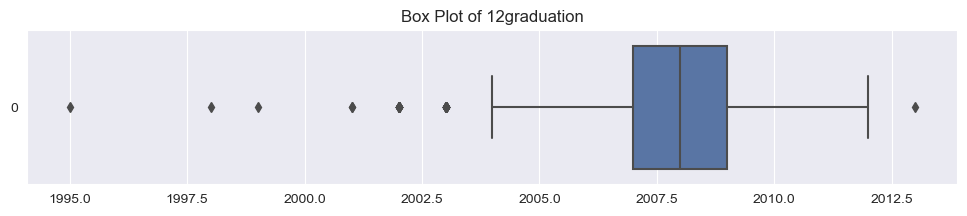

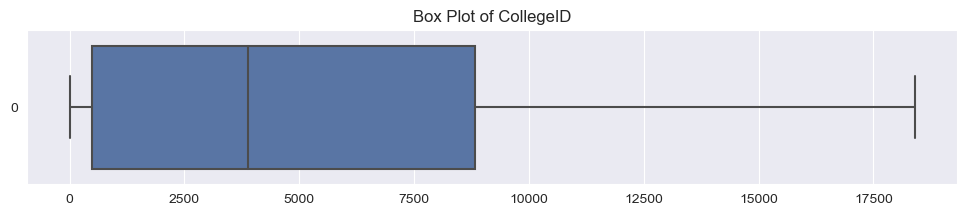

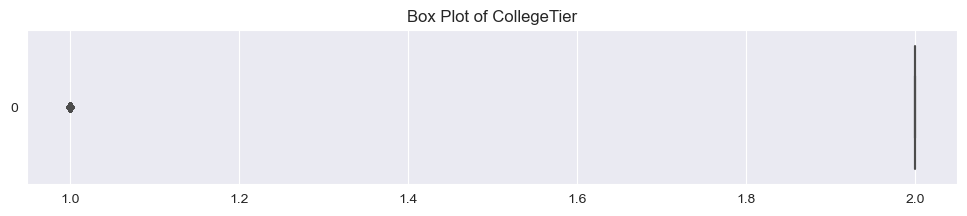

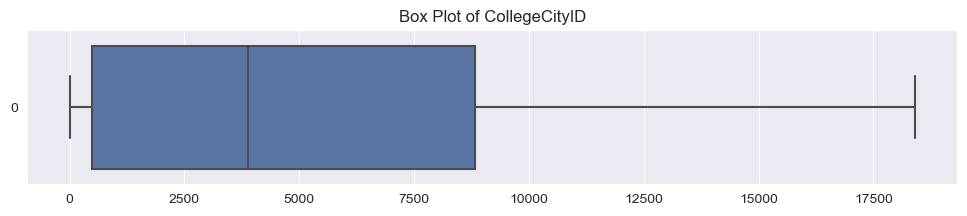

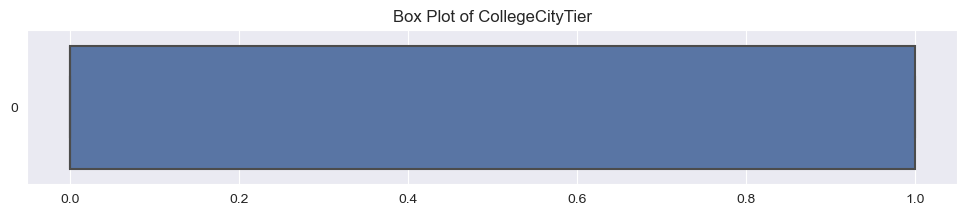

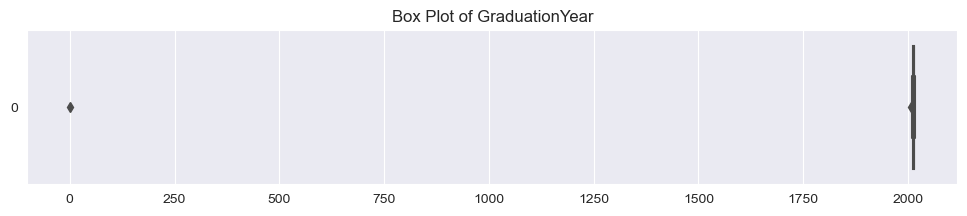

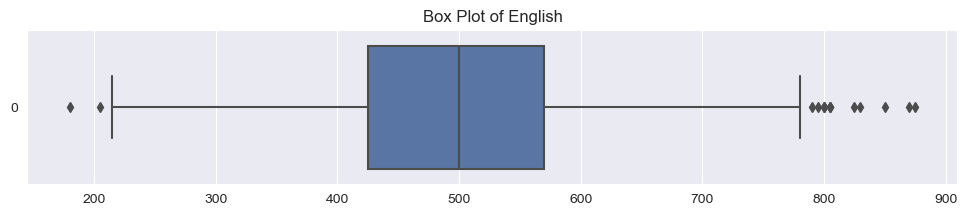

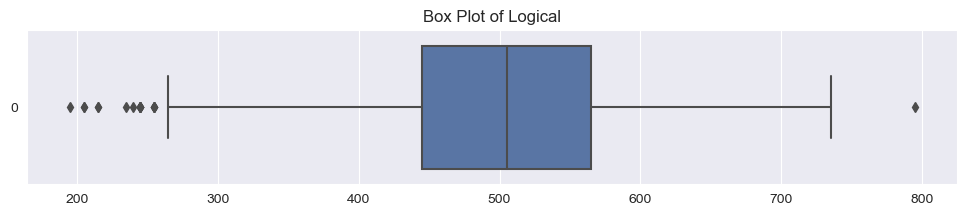

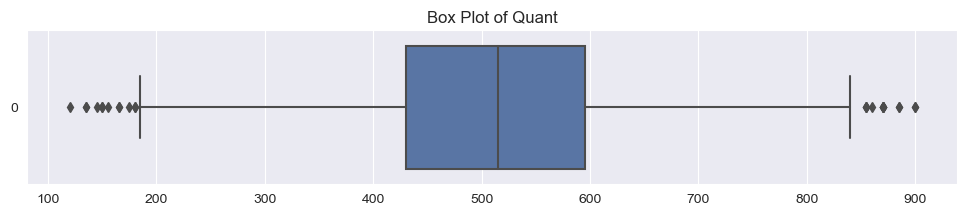

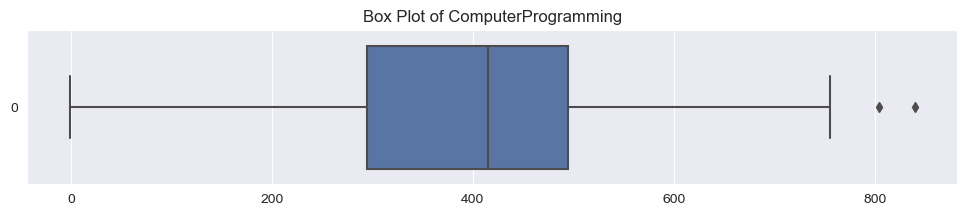

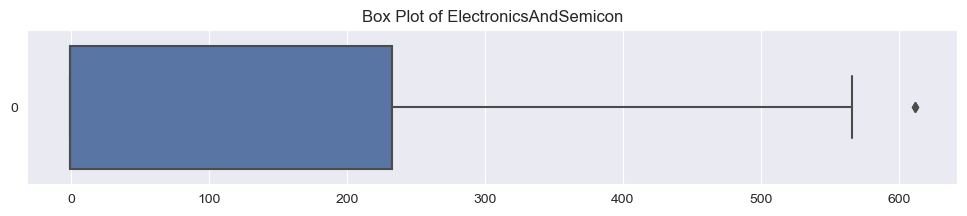

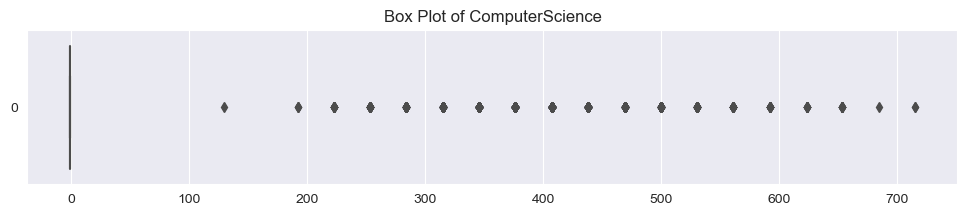

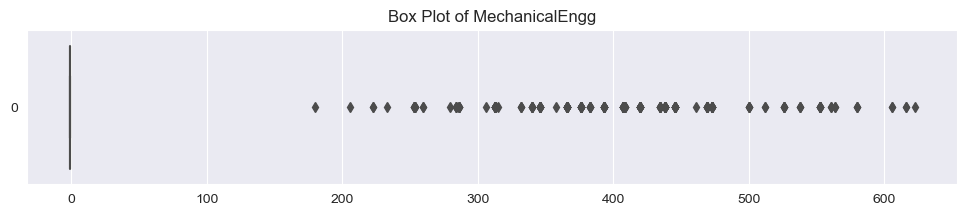

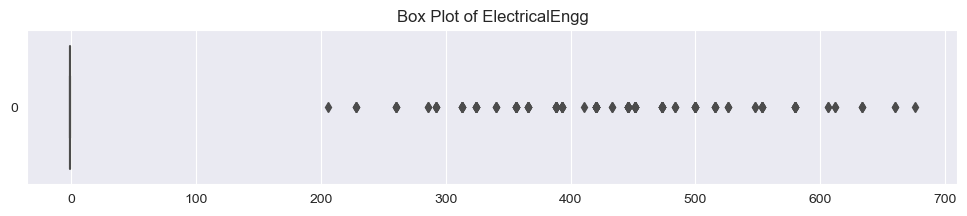

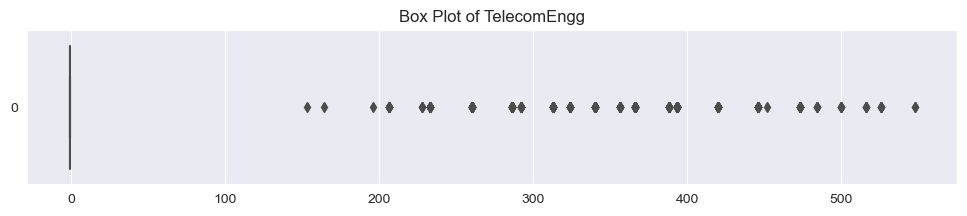

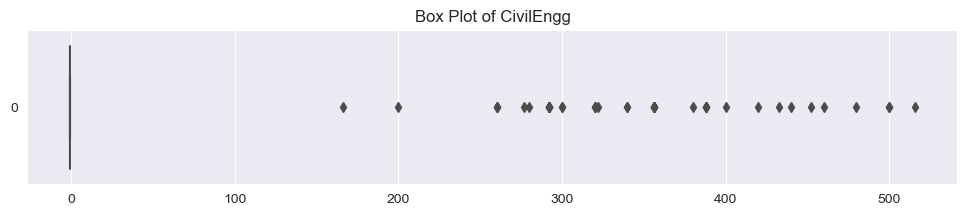

In [25]:
# Outliers detection in numeric columns

int_col=amcat_int.columns.to_list()
sb.set({"figure.figsize":(12,2)})
for i in range(len(int_col)):
    sb.boxplot(amcat_data[int_col[i]],orient="h")
    plt.title(f'Box Plot of {int_col[i]}')
    plt.show()


**Insights:** <br>
- As compared to other boxplots,We can see from the boxplots such as ComputerScience,MechinicalEng,CiviEng,ElectricalEng,TelecomEng are having outliers that are skewed right.It indicates that while all listed engineering scores are a few higher scores pulling the mean to the right.

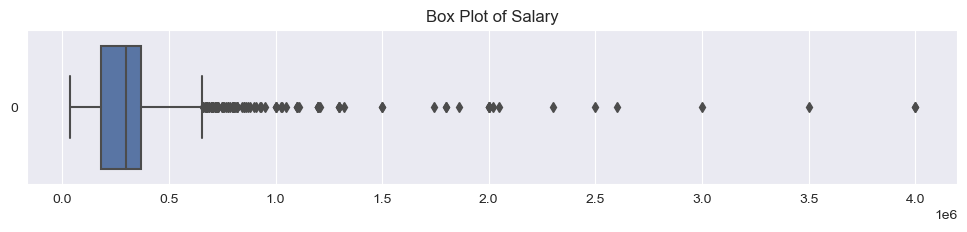

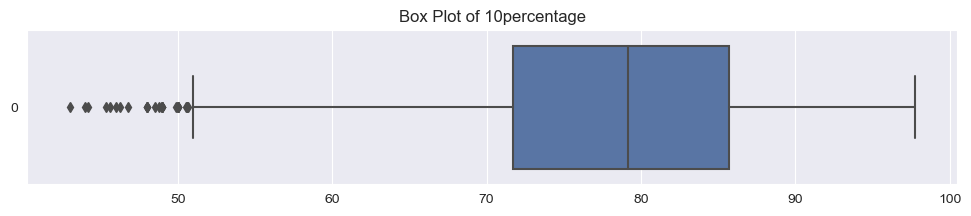

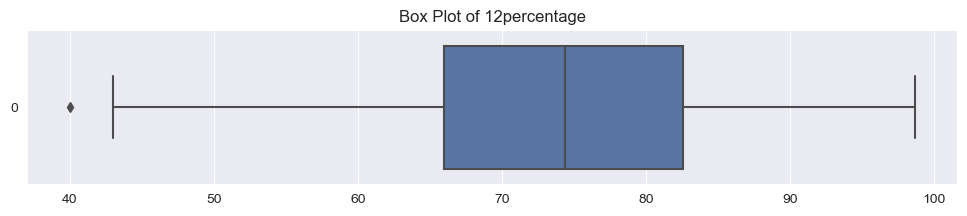

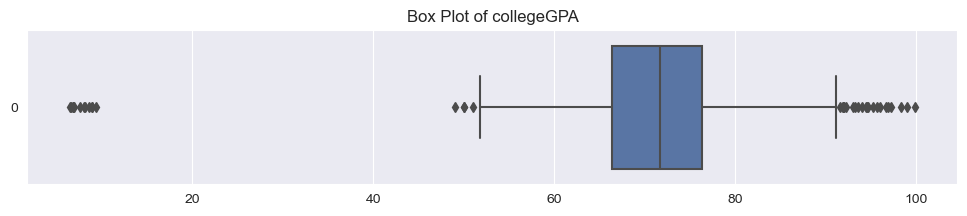

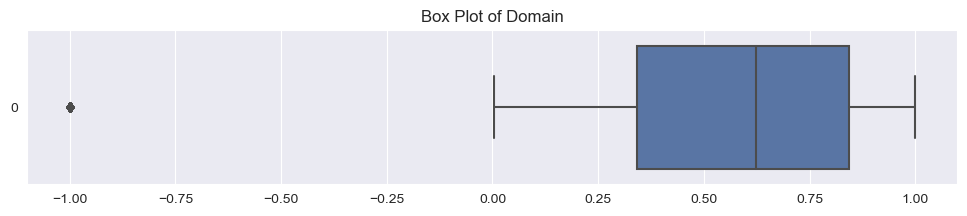

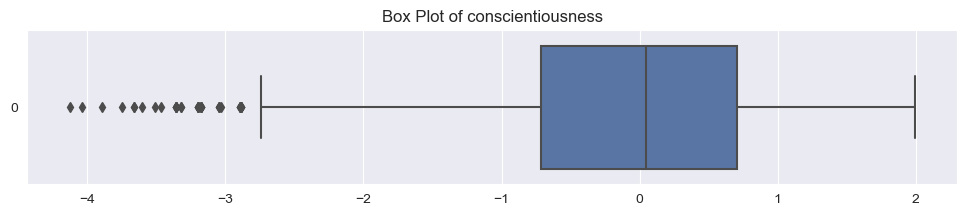

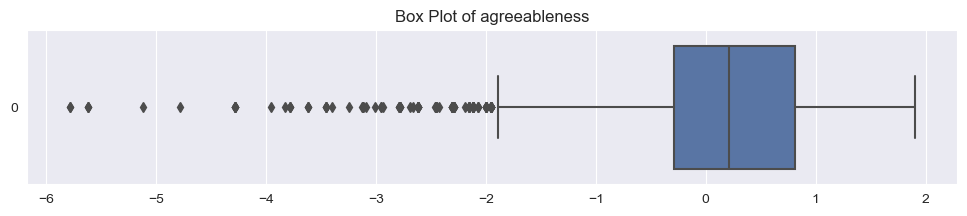

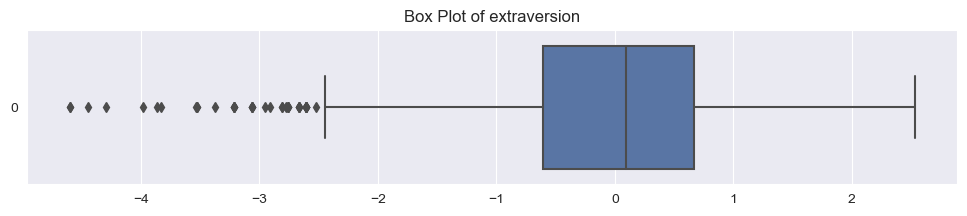

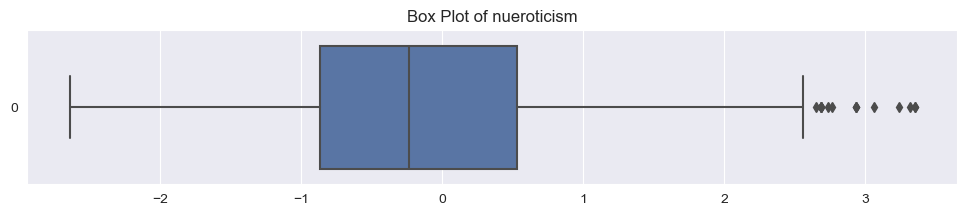

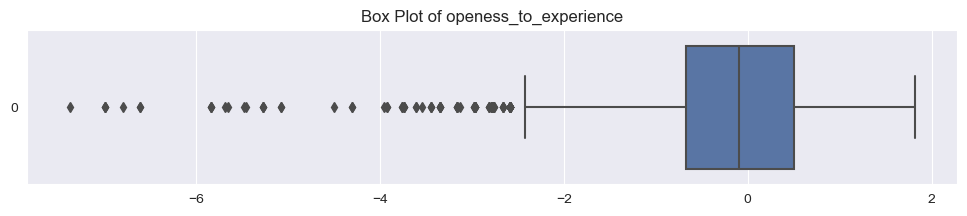

In [26]:
# Outlliers detection in numeric columns
float_col=amcat_float.columns.to_list()
sb.set({"figure.figsize":(12,2)})
for i in range(len(float_col)):
    sb.boxplot(amcat_data[float_col[i]],orient="h")
    plt.title(f'Box Plot of {float_col[i]}')
    plt.show()


**Insights:** <br>
- It is to be noted that the standardized scores of conscientiousness,agreeableness,extraversion, are having outliers that are skewed left as most of the students scored less.Whereas the salary pulling the mean to the right as few are earning more than the average.

In [27]:
#Visualize Salary field

In [28]:
# What percentage of the dataset is male and female?
gender=amcat_data["Gender"].value_counts()
Male=gender["m"]/(gender["m"]+gender["f"])
Female=1-Male

print(f"Male : {round(Male,2)*100}%")
print(f"Female : {round(Female,2)*100}%")

Male : 76.0%
Female : 24.0%


<Axes: ylabel='Gender'>

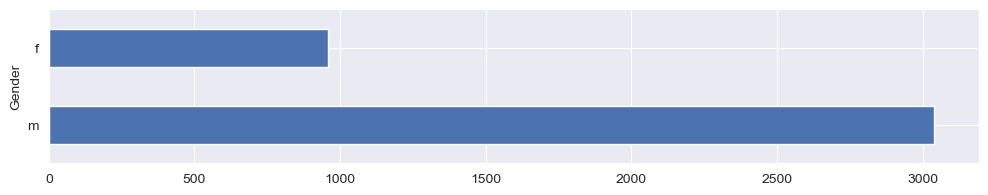

In [29]:
# Plotting out male and female.

gender.plot(kind="barh")

**Insights:** <br>
- It is to be noted that nearly 76% of male and Female of 24% had appeared for the AMCAT exam.

In [30]:
#What are the top 10 most common specializations among candidates?
spl=amcat_data["Specialization"].value_counts()[:10]
spl

Specialization
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: count, dtype: int64

<Axes: ylabel='Specialization'>

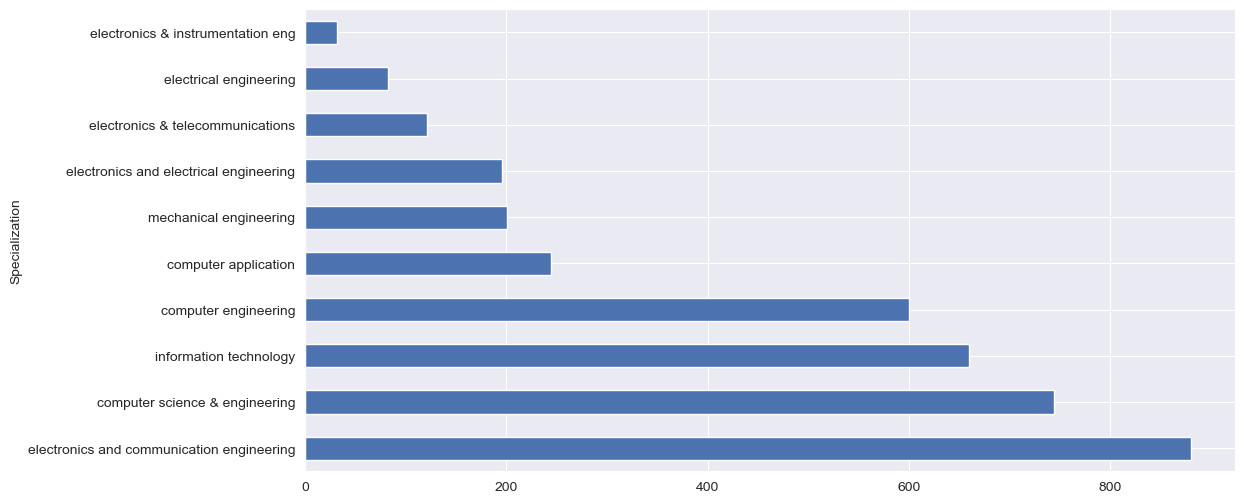

In [31]:
# Plot the specializations
plt.figure(figsize=(12,6))
spl.plot(kind="barh")

**Insights:** <br>
- From the above plot it is observed that on top 10 Specializations, Electronics and Communication Engineering got topped in first with 800 candidates for this Specialization and the least admited course was Electronics and Instrumental engineering holds 32 cadidates.

In [32]:
#How many candidates graduated in each year?
grad=amcat_data.groupby("GraduationYear").size()
grad

GraduationYear
0          1
2007       1
2009      24
2010     292
2011     507
2012     847
2013    1181
2014    1036
2015      94
2016       7
2017       8
dtype: int64

<Axes: ylabel='GraduationYear'>

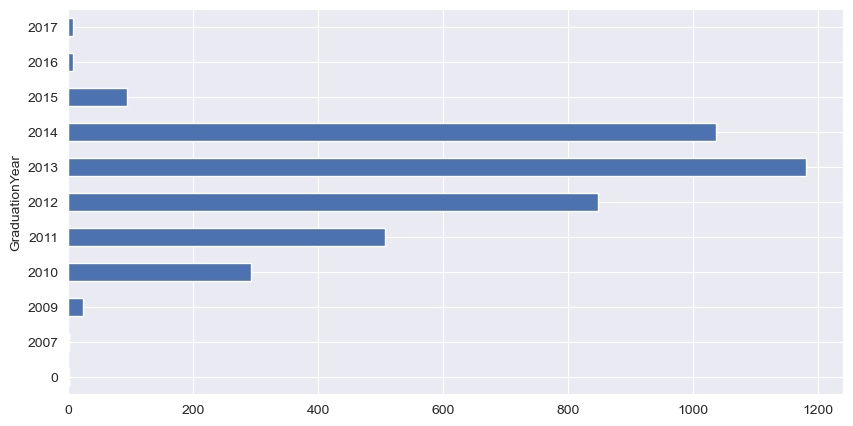

In [33]:
# Plot the GraduationYear

plt.figure(figsize=(10,5))
grad.plot(kind="barh")

**Insights:** <br>
- Above plot represents that the year 2013 had the maximum number of graduated candidates nearly 1181.

<Axes: xlabel='English', ylabel='Density'>

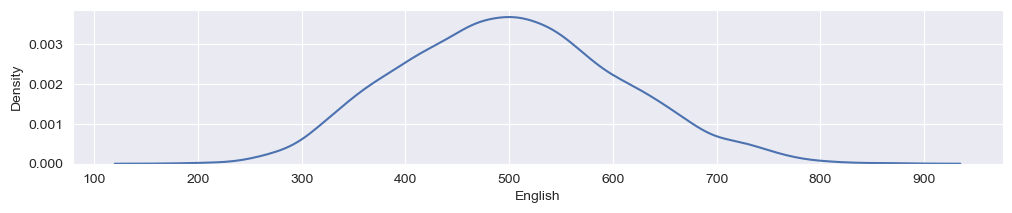

In [34]:
#How do the English scores vary across the dataset?
sb.kdeplot(data=amcat_data,x="English")

**Insights:** <br>
- The possible scores for the English section are ranged from 100 to 900 ,in which the most peaked point at 500 is the most common scored marks.And the curve is skewed right as it notes that few are scored higher than the average.

In [35]:
#How many students are from each college tier ?

tier=amcat_data.groupby("CollegeTier").size()
tier

CollegeTier
1     297
2    3701
dtype: int64

<Axes: ylabel='CollegeTier'>

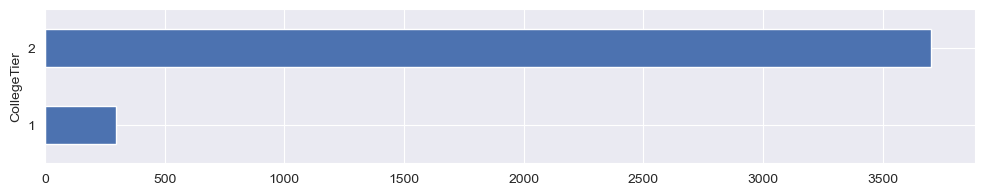

In [36]:
# Plot the CollegeTier

tier.plot(x="CollegeTier",kind="barh")

**Insights:** <br>
- Nearly 3,700 students appeared for the exam from Tier2 Colleges.

In [37]:
#What are the statistics of 12th board percentages?

Univariate_Numerical_Analysis(amcat_data[["12percentage"]])

********** 12percentage **********
min         40.000000
max         98.700000
mean        74.466366
median      74.400000
std         10.999933
skew        -0.032607
kurtosis    -0.630737
Name: 12percentage, dtype: float64 



In [38]:
#How do agreeableness scores vary across different job cities?
agree_by_city = amcat_data.groupby('JobCity')['agreeableness'].mean().sort_values(ascending=False)[:15]
print(agree_by_city)

JobCity
 Pune                 1.9048
Kalmar, Sweden        1.7488
LONDON                1.7109
Gorakhpur             1.5928
Trichur               1.5928
Banagalore            1.5444
Jamnagar              1.5444
Chennai, Bangalore    1.4368
sampla                1.3779
VIZAG                 1.3779
Ganjam                1.3198
Calicut               1.2808
BAngalore             1.2114
kakinada              1.2114
Bhagalpur             1.2114
Name: agreeableness, dtype: float64


In [39]:
#How do the top 10% of candidates in Computer Science scores compare to the rest?
top_10_cent=amcat_data["ComputerScience"].quantile(.90)

top_10=amcat_data[amcat_data.ComputerScience>=top_10_cent]
rest=amcat_data[amcat_data.ComputerScience<top_10_cent]

print("Top_10_cent :",top_10_cent)

Top_10_cent : 407.0


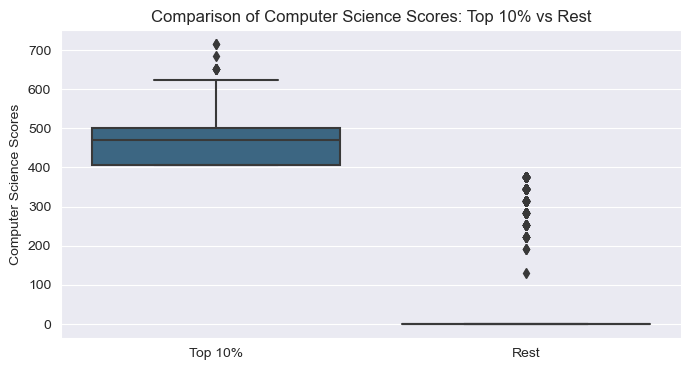

In [40]:
# Visualize the comparison using box plots
plt.figure(figsize=(8, 4))
sb.boxplot(data=[top_10['ComputerScience'], rest['ComputerScience']], palette='viridis')
plt.xticks([0, 1], ['Top 10%', 'Rest'])
plt.title('Comparison of Computer Science Scores: Top 10% vs Rest')
plt.ylabel('Computer Science Scores')
plt.show()

**Insights:** <br>
- This comparison highlights that the top 10% of candidates not only score higher but also have more consistent performance in Computer Science,because of higher median scores with less variability. Unlike more variability and a lower median score of the rest scores.

In [41]:
# How many college students from each state
each_state=amcat_data.groupby("CollegeState").size().sort_values(ascending=False)
each_state

CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
dtype: int64

<Axes: xlabel='CollegeState'>

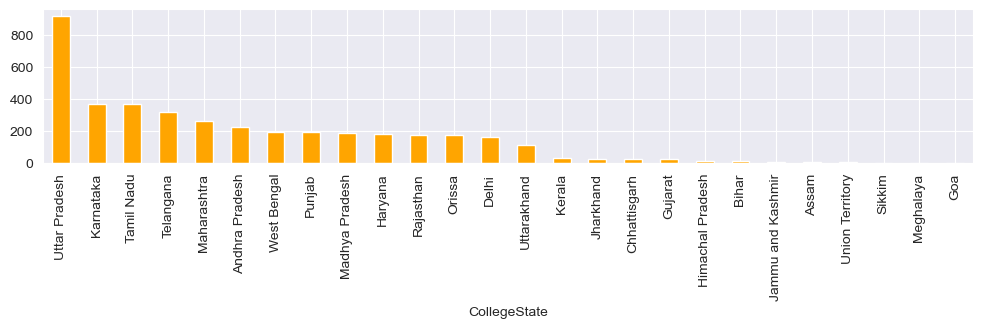

In [42]:
# plot first 10 records from each_state.
each_state.plot(kind="bar",color="orange")

**Insights:** <br>
- From the top 10 records,this barplot highlights that students from Uttar Pradesh about 915 are in higher than other states taken AMCAT Exam.

In [43]:
# Get the student details from Andhra pradesh who took biotechnology
bioTech_ap=amcat_data[(amcat_data["CollegeState"]=="Andhra Pradesh") & (amcat_data["Specialization"]=="biotechnology")]
bioTech_ap.T

,555
ID,318523
Salary,400000.0
DOJ,2012-06-01 00:00:00
DOL,2024-10-03 18:53:12.112796
Designation,systems engineer
JobCity,Hyderabad
Gender,m
DOB,1991-06-20 00:00:00
10percentage,87.0
10board,ssc


<h2><center>Bivariate Analysis 

<f5>**Defination:**   Bivariate analysis is a statistical method used to examine the relationship between two variables.It helps      in understanding the association, &emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;   correlation, or causality between two variables.

##### A. Categorical vs Categorical_Analysis

<Axes: ylabel='Designation'>

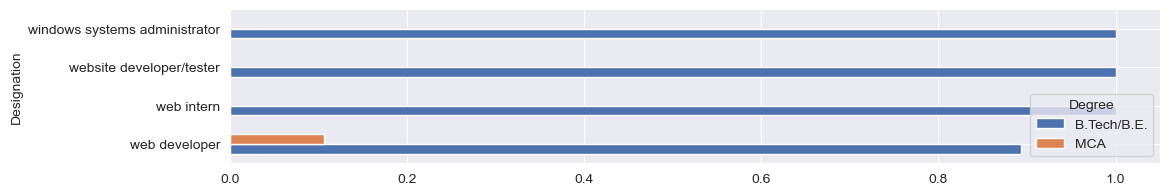

In [44]:
tab = pd.crosstab(amcat_data["Designation"].sort_values(ascending=False)[:50], amcat_data['Degree'], normalize='index')
tab.plot(kind='barh')

In [45]:
# Are certain job designations more common among male or female candidates? Get first 15 designations.
desig_gender = pd.crosstab(amcat_data['Designation'], amcat_data['Gender'])[:15]

desig_gender

Gender,f,m
Designation,,
.net developer,8,26
.net web developer,1,3
account executive,2,2
account manager,0,1
admin assistant,0,2
administrative coordinator,0,1
administrative support,1,0
aircraft technician,1,0
android developer,14,32


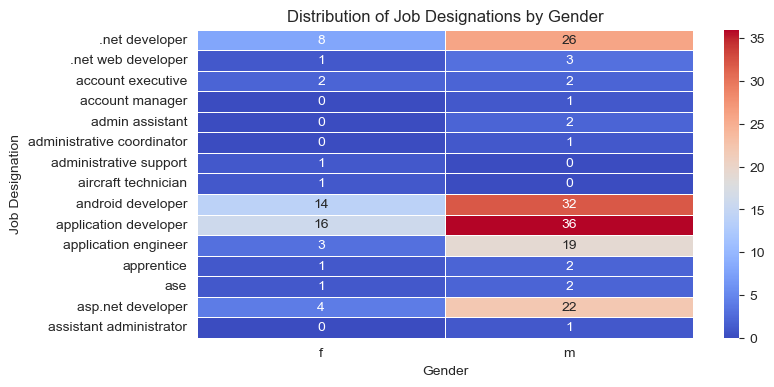

In [46]:
plt.figure(figsize=(8, 4))
sb.heatmap(desig_gender, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Distribution of Job Designations by Gender')
plt.xlabel('Gender')
plt.ylabel('Job Designation')
plt.show()

**Insights:** <br>
- It's noted form the first 15 designations,that maximum number of males are associated with job designation as application developer with 36 counts and females with 16 counts.And females are the one with maximum distributions of "0" designation count.

##### B. Numerical vs Categorical_Analysis

In [47]:
#Do male and female candidates have different average salaries?
salary_by_gender = amcat_data.groupby('Gender')['Salary'].mean()
salary_by_gender

Gender
f    294937.304075
m    311716.211772
Name: Salary, dtype: float64

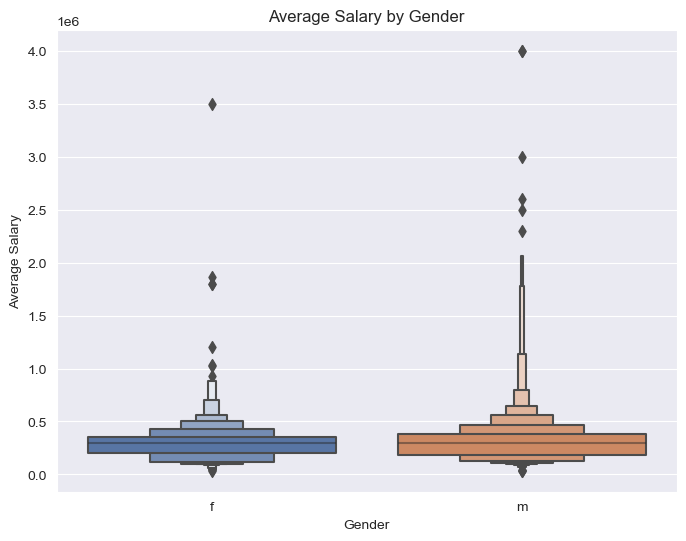

In [48]:
plt.figure(figsize=(8, 6))
sb.boxenplot(x="Gender",y="Salary",data=amcat_data)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

**Insights:** <br>
- We can see that males are tend to earn a higher distributed salaries compared to the females though the average salary tend to approximately same.

In [49]:
#How do logical reasoning scores vary across different job cities?Get top 20

job_logical=amcat_data.groupby("JobCity")["Logical"].mean().sort_values(ascending=False)[:20]
job_logical

JobCity
Gulbarga                   680.0
Kalmar, Sweden             675.0
Madurai                    670.0
Jaipur                     670.0
Johannesburg               655.0
gurgoan                    650.0
Haldia                     645.0
Jamnagar                   645.0
Bhagalpur                  640.0
raipur                     640.0
Rajpura                    635.0
Kolkata                    635.0
Manesar                    625.0
Navi Mumbai , Hyderabad    625.0
Ahmedabad                  615.0
Ranchi                     615.0
Gonda                      615.0
Bellary                    610.0
Kochi                      609.5
Sambalpur                  605.0
Name: Logical, dtype: float64

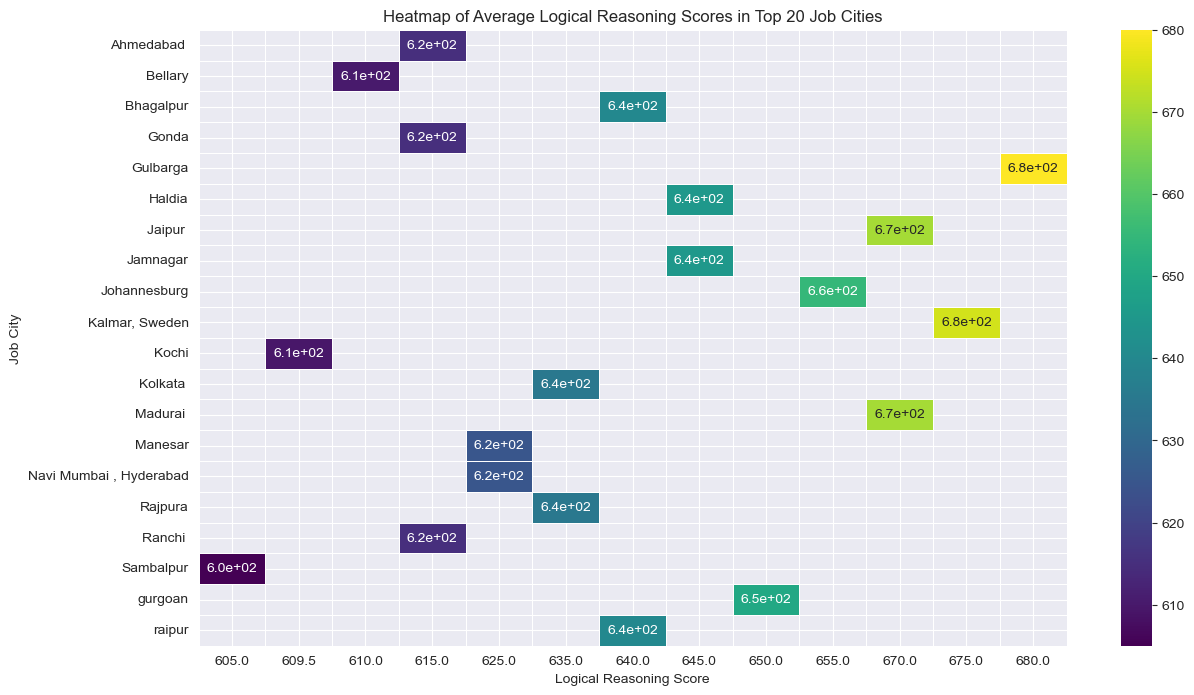

In [50]:
heatmap = job_logical.reset_index().pivot(index='JobCity', columns='Logical', values='Logical')

# Plot the data
plt.figure(figsize=(14, 8))
sb.heatmap(heatmap, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Average Logical Reasoning Scores in Top 20 Job Cities')
plt.xlabel('Logical Reasoning Score')
plt.ylabel('Job City')
plt.show()

**Insights:** <br>
- For the top 20 jobcities,Gulbarga city had the higher logical reasoning score of 680 and lower score was found in Sambalpur city respectively.

In [51]:
#How does specialization affect the salary of candidates?
sal_special=amcat_data.groupby("Specialization")["Salary"].mean().sort_values()
sal_special

Specialization
electronics                                     40000.000000
mechanical & production engineering            100000.000000
power systems and automation                   100000.000000
computer and communication engineering         120000.000000
aeronautical engineering                       148333.333333
embedded systems technology                    200000.000000
electrical and power engineering               210000.000000
electronics and computer engineering           220000.000000
automobile/automotive engineering              222000.000000
instrumentation engineering                    240000.000000
computer science and technology                245833.333333
mechatronics                                   253750.000000
biotechnology                                  254333.333333
other                                          266538.461538
information science engineering                276296.296296
computer science & engineering                 277439.516129
electroni

In [52]:
#What is the distribution of salaries across different job cities?
sal_special=amcat_data.groupby("JobCity")["Salary"].mean().sort_values()[:20]
sal_special

JobCity
Howrah                     60000.0
Muvattupuzha               65000.0
Trichur                    75000.0
ahmedabad                  80000.0
Bhubaneswar                80000.0
Technopark, Trivandrum     85000.0
Ernakulam                  95000.0
ghaziabad                 100000.0
BHOPAL                    100000.0
kolhapur                  100000.0
Kolkata`                  100000.0
Mettur, Tamil Nadu        100000.0
Panchkula                 100000.0
Burdwan                   100000.0
Chandigarh                100000.0
Miryalaguda               100000.0
Madurai                   100000.0
VIZAG                     105000.0
Tirunelvelli              105000.0
BANGLORE                  105000.0
Name: Salary, dtype: float64

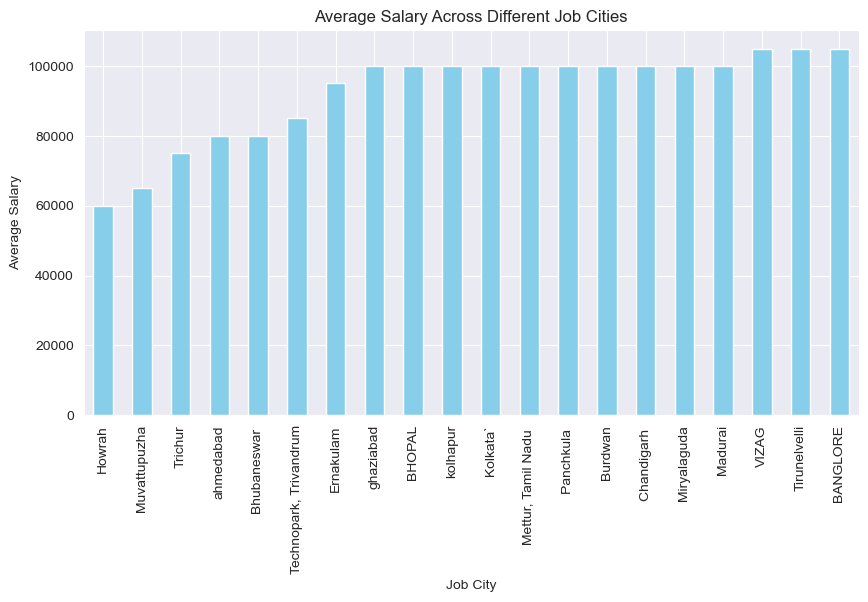

In [53]:
#Plot distribution of salaries
plt.figure(figsize=(10, 5))
sal_special.plot(kind='bar', color='skyblue')
plt.title('Average Salary Across Different Job Cities')
plt.xlabel('Job City')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

**Insights:** <br>
- Out of top 20 jobcities,cities like VIZAG,Tirunelvelli,BANGLORE holds the same average salary package of 1,05,000.In which Howrah is the one with lowest average salary package.

In [54]:
#How does the distribution of graduation years vary across different states?
state_gradyear = amcat_data.groupby(['CollegeState', 'GraduationYear']).size().unstack(fill_value=0)
state_gradyear

GraduationYear,0,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017
CollegeState,,,,,,,,,,,
Andhra Pradesh,0,1,1,22,22,50,62,60,6,1,0
Assam,0,0,0,0,0,1,3,1,0,0,0
Bihar,0,0,1,0,1,1,2,4,1,0,0
Chhattisgarh,0,0,0,0,2,6,13,6,0,0,0
Delhi,0,0,1,9,11,33,57,47,4,0,0
Goa,0,0,0,0,0,0,0,1,0,0,0
Gujarat,0,0,0,7,2,2,7,6,0,0,0
Haryana,0,0,0,5,26,58,48,41,1,0,1
Himachal Pradesh,0,0,0,0,0,0,0,14,2,0,0


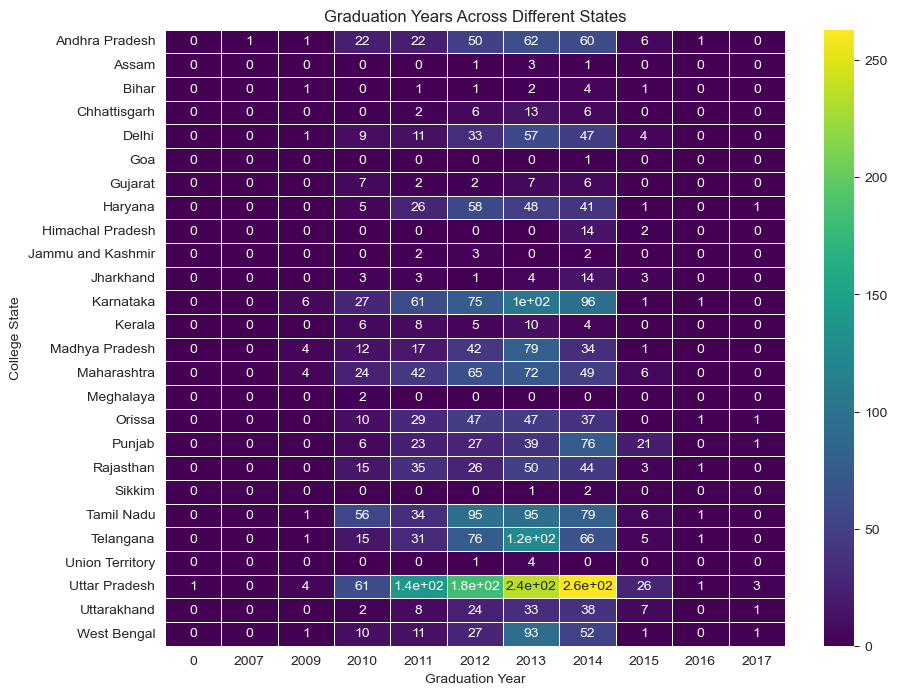

In [55]:
# Visualize heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(state_gradyear, annot=True, cmap='viridis', linewidths=.5)
plt.title('Graduation Years Across Different States')
plt.xlabel('Graduation Year')
plt.ylabel('College State')
plt.show()

**Insights:** <br>
- Concerned heatmap shows that 263 candidates form Uttar Pradesh got graduated in 2014 and 234 candidates in 2013,which correlates with the facilites avaliable in the cities to topped among all.

In [56]:
# How do computer programming scores vary across different specializations?
special_scores = amcat_data.groupby('Specialization')['ComputerProgramming'].mean().reset_index()
special_scores =special_scores.sort_values(ascending=False,by="ComputerProgramming")
special_scores[:25]

,Specialization,ComputerProgramming
8,computer and communication engineering,655.000000
12,computer science,560.000000
5,ceramic engineering,515.000000
30,information & communication technology,505.000000
31,information science,505.000000
26,embedded systems technology,495.000000
22,electronics and computer engineering,485.000000
10,computer engineering,473.248333
13,computer science & engineering,456.498656
9,computer application,453.877049


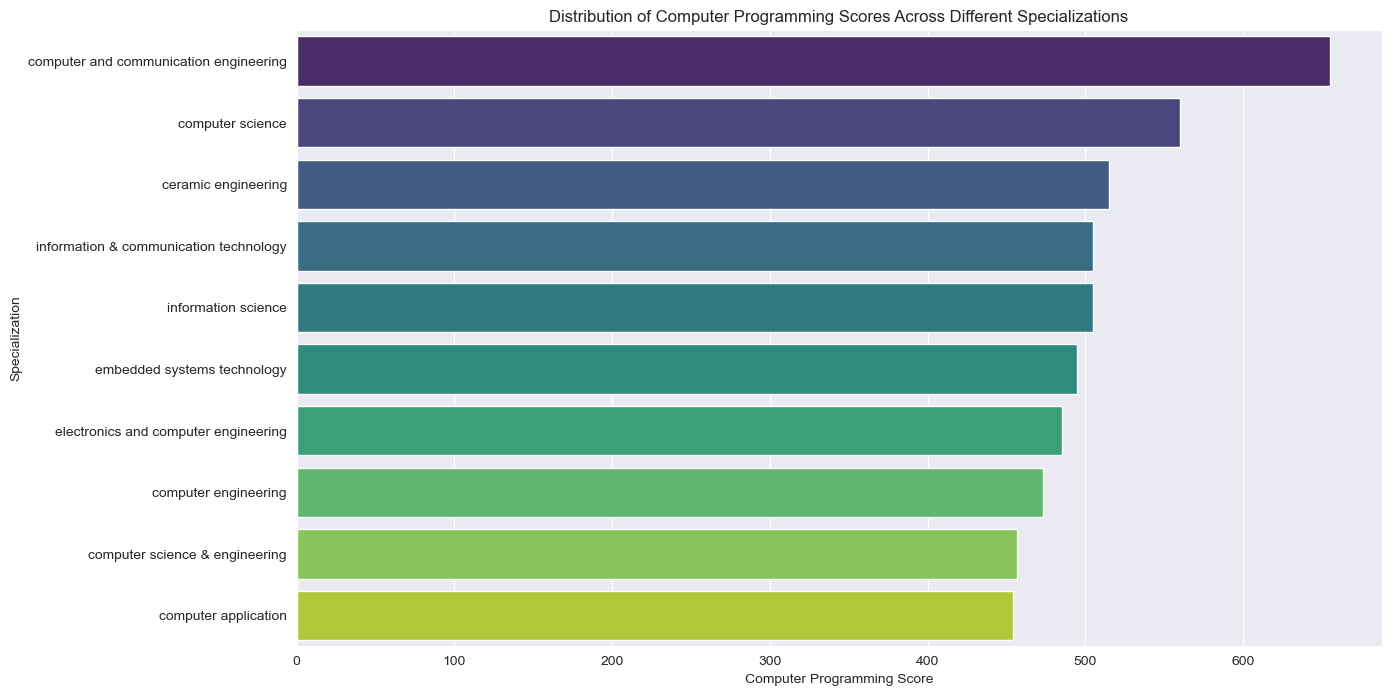

In [57]:
plt.figure(figsize=(14, 8))
sb.barplot(x='ComputerProgramming', y='Specialization', data=special_scores[:10], palette='viridis')
plt.title('Distribution of Computer Programming Scores Across Different Specializations')
plt.xlabel('Computer Programming Score')
plt.ylabel('Specialization')
plt.show()

**Insights:** <br>
- This barghaph of top 10 records indicates that computer and communication engineering specialization topped among the all with a score of computer programming is 655, in which computer applications scores less around 470.

##### C. Numerical vs Numerical_Analysis

In [58]:
#Is there a correlation between 10th and 12th percentages?
correlation = amcat_data['10percentage'].corr(amcat_data['12percentage'])
print(f'Pearson correlation coefficient : {correlation}')

Pearson correlation coefficient : 0.6433777960234048


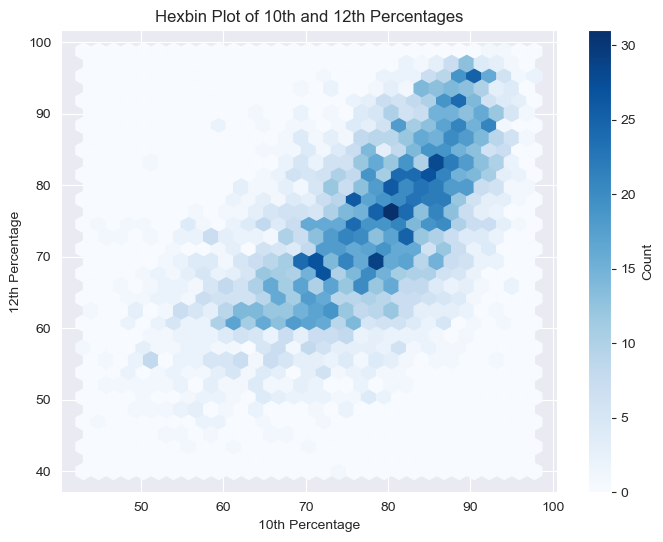

In [59]:
plt.figure(figsize=(8, 6))
plt.hexbin(amcat_data['10percentage'], amcat_data['12percentage'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of 10th and 12th Percentages')
plt.xlabel('10th Percentage')
plt.ylabel('12th Percentage')
plt.show()

**Insights:** <br>
- We can see the strong positive correlation between the 10th and 12th percentages with pearson value of correlation 0.64 .If the student who scores better in 10th will definitely score in 12th grade too.

In [60]:
#How does college GPA affect salary?
cgpa=amcat_data.collegeGPA.corr(amcat_data.Salary)
print(f'Pearson correlation between college GPA and salary: {cgpa}')

Pearson correlation between college GPA and salary: 0.13010251907112563


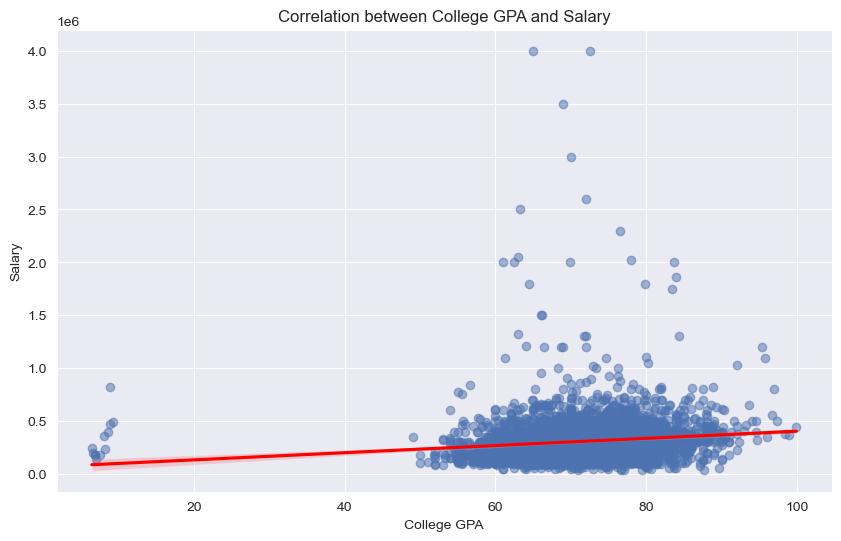

In [61]:
plt.figure(figsize=(10, 6))
sb.regplot(x='collegeGPA', y='Salary', data=amcat_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between College GPA and Salary')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

**Insights:** <br>
- Though we see a weak positive correlation value of 0.13 ,Sometimes the cgpa will work as the it is high.Also ,in some cases external factors deals with salary such as Logical Reasoning ,Quant ,more...Finally, there is no relation b/w the variates in this analysis.

In [62]:
amcat_int.columns

Index(['ID', '12graduation', 'CollegeID', 'CollegeTier', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'],
      dtype='object')

In [63]:
# Calculate the Pearson correlation coefficient and visualize using a scatter plot for GraduationYear vs Salary.
grad_sal=amcat_data.openess_to_experience.corr(amcat_data.Salary)
grad_sal

-0.011312268472631556

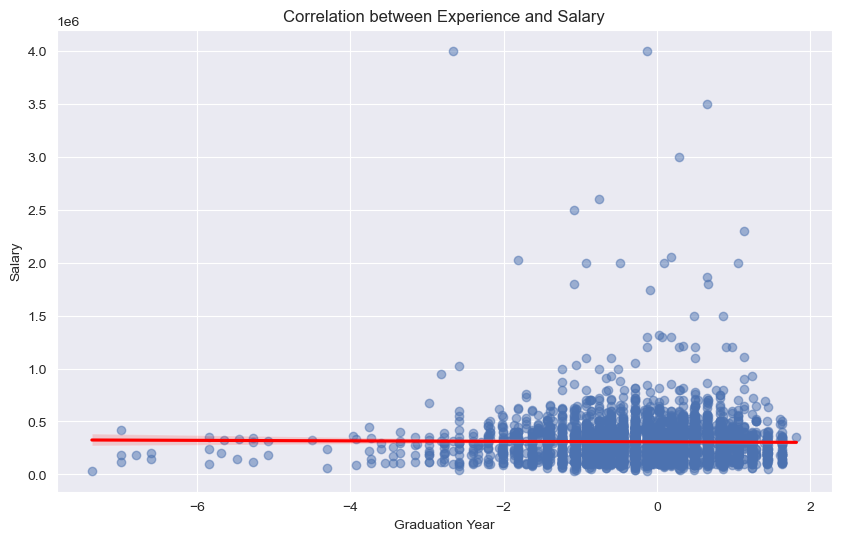

In [64]:
# Visualize
plt.figure(figsize=(10, 6))
sb.regplot(x='openess_to_experience', y='Salary', data=amcat_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Experience and Salary')
plt.xlabel('Graduation Year')
plt.ylabel('Salary')
plt.show()

**Insights:** <br>
- Though we see a weak positive correlation value of 0.104 ,There are only few chances if experience is more the salary is more only in growth areas which depends on skillset and external factors.

Pearson correlation coefficient : 0.6433777960234048


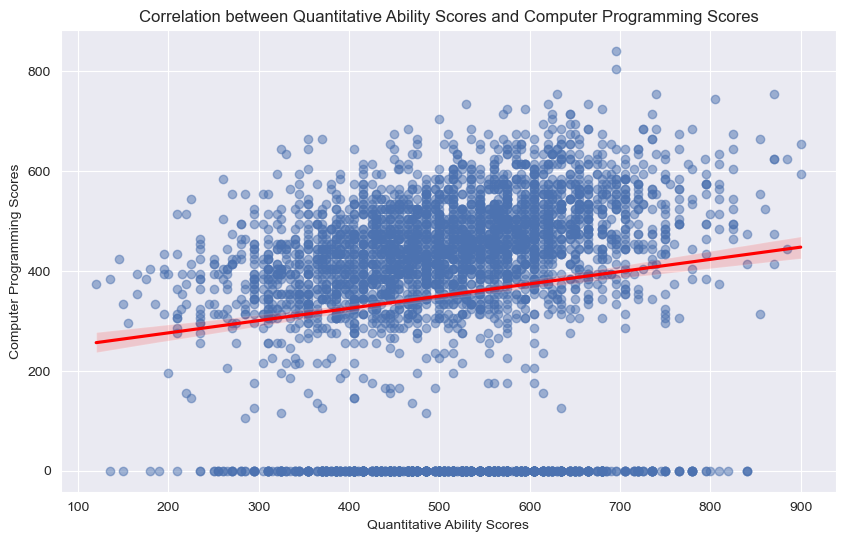

In [65]:
#How do quantitative ability scores correlate with computer programming scores?
quant_scores = amcat_data['Quant'].corr(amcat_data['ComputerProgramming'])
print(f'Pearson correlation coefficient : {correlation}')

# Visualize the correlation using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sb.regplot(x='Quant', y='ComputerProgramming', data=amcat_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Quantitative Ability Scores and Computer Programming Scores')
plt.xlabel('Quantitative Ability Scores')
plt.ylabel('Computer Programming Scores')
plt.show()


**Insights:** <br>
- A strong positive correlation value of 0.64 can be seen that there is linear relationship between programming scores and quantitative scores.And this type of candidates have good effect on salary & skillset.

Pearson correlation coefficient : 0.3061603833272482


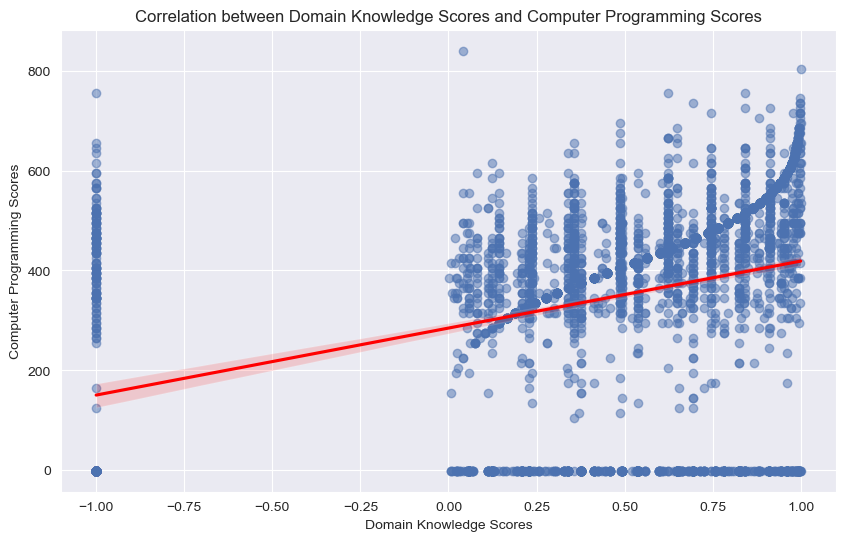

In [66]:
#How do domain knowledge scores correlate with computer programming scores?

correlation = amcat_data['Domain'].corr(amcat_data['ComputerProgramming'])
print(f'Pearson correlation coefficient : {correlation}')

plt.figure(figsize=(10, 6))
sb.regplot(x='Domain', y='ComputerProgramming', data=amcat_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Domain Knowledge Scores and Computer Programming Scores')
plt.xlabel('Domain Knowledge Scores')
plt.ylabel('Computer Programming Scores')
plt.show()

**Insights:** <br>
- Though we see a weak positive correlation value of 0.306 ,There are only few chances that the domain knoweledge can be appiled inorder to score in programming in case study scenerios,higher the domain knowledge the chances are high in programming scoring .

### Research Questions

<h4>**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering, <br>
    if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer  <br>
    you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [67]:
from scipy import stats

# Concern roles 
concern_role = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']
concern_data=amcat_data[amcat_data['Designation'].isin(concern_role)]
salary_data = concern_data["Salary"]

# one-sample t-test
mean_salary = 2.75 * (10**5)  
t_stat, p_value = stats.ttest_1samp(salary_data,mean_salary)

# Print results
print(f"Mean Salary: {mean_salary}")
print(f"Concern_role Mean Salary: {salary_data.mean()}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The average salary is significantly different from the claimed mean.")
else:
    print("\nFail to reject the null hypothesis: The average salary is not significantly different from the claimed mean.")

Mean Salary: 275000.0
Concern_role Mean Salary: 339790.4624277457
T-statistic: 12.9330
P-value: 0.0000

Reject the null hypothesis: The average salary is significantly different from the claimed mean.


<h4>**Bonus : Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [68]:
import pandas as pd
from scipy import stats as st

# contingency table
conti_tab = pd.crosstab(index=amcat_data["Specialization"], columns=amcat_data["Gender"])

# Chi-square test
chi2_stat, p_value, dof, exp_freq = st.chi2_contingency(conti_tab)

alpha = 0.05

# Print results
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference between gender and specialization.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference between gender and specialization.")



Reject the null hypothesis: There is a significant difference between gender and specialization.


In [69]:
# Is there a correlation between English proficiency scores and logical reasoning scores?import pandas as pd

from scipy.stats import pearsonr

english_scores = amcat_data['English']
logical_scores = amcat_data['Logical']

correlation, p_value = pearsonr(english_scores, logical_scores)

# Print the results
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between English proficiency scores and logical reasoning scores.")
else:
    print("There is no significant correlation between English proficiency scores and logical reasoning scores.")


Pearson correlation coefficient: 0.4444
P-value: 0.0000
There is a significant correlation between English proficiency scores and logical reasoning scores.


<h3>**Conclusion :

Through this entire Exploratory Data Analysis, the drawn insights deals with the salary field which gives the hypothetical ideas about the how the particular parameters contributes the job opportunities that may be the specialization,exam scores,skills and more in the path. Few key points are...

1. **Salary Distribution**:
   - The salary attribute shows right-skewed outliers, indicating that a few candidates earn significantly more than the average salary.<br><br>


2. **Engineering Scores**:
   - Fields like Computer Science, Mechanical Engineering, Civil Engineering, Electrical Engineering, and Telecom Engineering have right-skewed outliers, suggesting higher scores pulling the mean to the right.<br><br>

3. **Personality Scores**:
   - Standardized scores for conscientiousness, agreeableness, and extraversion are left-skewed, indicating most students scored lower in these traits.<br><br>

4. **Gender Distribution**:
   - Approximately 76% of AMCAT exam takers are male, while 24% are female.<br><br>

5. **Specializations**:
   - Electronics and Communication Engineering has the highest number of candidates (800), while Electronics and Instrumentation Engineering has the least (32).<br><br>

6. **State-wise Participation**:
   - Uttar Pradesh has the highest number of candidates (915) taking the AMCAT exam, compared to other states.<br><br>
7. **Hypothesis Analysis**:   
   - We Reject the null hypothesis as " There is a significant difference between gender and specialization".It means that there is a statistically significant difference between gender and specialization. This implies that gender and specialization are not independent, and there is some form of association between them,since the p-value is less than at 0.05 significance level.


<h3><center>--- End ---